**How to increase cross selling of Banking Products**

**Name**: Cross selling recommendation

**Report date**: July 25, 2021
 
**Email**: peterkin_nicolette@yahoo.com 

**Country**: Jamaica 

**Specialization**: Data Analyst 

**Group Name**: Dynasty 



**Problem description**: 

Changing to a new selling technique requires a lot of research and data analyzing to ensure that the right cross selling strategy is used to re-enter the market. The issue XYZ credit union is having currently is that they do not know what actions to take in order to increase cross selling in the credit union. 


**Data Understanding**

In [5]:
import zipfile
with zipfile.ZipFile('./cross_selling.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

KeyboardInterrupt: ignored

#### Here we pulled and unzipped the dataset. 

In [6]:
%%writefile configuration.yaml
file_type: csv
dataset_name: train
file_name: Train
table_name: train_data
inbound_delimiter: ","
outbound_delimiter: "|"
skip_leading_rows: 1
columns:

Overwriting configuration.yaml


In [7]:
%%writefile utility.py
import math
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime 
import gc
import re
import gzip
import shutil


################
# File Reading #
################

def read_config_file(filepath):
    with open(filepath, 'r') as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            logging.error(exc)


Overwriting utility.py


In [1]:
import pandas as pd
import utility as util

# Read config file
config_data = util.read_config_file("configuration.yaml")

# read the file using config file
file_type = config_data['file_type']
source_file = "./" + config_data['file_name'] + f'.{file_type}'

#print("",source_file)
df = pd.read_csv(source_file,config_data['inbound_delimiter'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Total missing values for each feature
print(df.isnull().sum())

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

##### The above shows that there are missing values in the dataset.

In [3]:
# Data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

##### The dataframe consist of eight(8) floats64, twenty-three(23) int64 and seventeen(17) object.
                              


In [4]:
# show rows with missing value for ind_empleado
df[df['ind_empleado'].isnull()]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
261,2015-01-28,1050741,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1029,2015-01-28,1051017,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1063,2015-01-28,1051064,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1154,2015-01-28,1051387,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1779,2015-01-28,1048660,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775976,2015-06-28,550081,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0
3776175,2015-06-28,550693,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0
3776230,2015-06-28,549518,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0
3776279,2015-06-28,549207,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0


##### The table above shows that there are NA and NAN values that we will need to clean later in our EDA.

In [ ]:
df1 = df[df.isna().any(axis=1)]
print(df1);

          fecha_dato  ncodpers  ... ind_nom_pens_ult1 ind_recibo_ult1
0         2015-01-28   1375586  ...               0.0               0
1         2015-01-28   1050611  ...               0.0               0
2         2015-01-28   1050612  ...               0.0               0
3         2015-01-28   1050613  ...               0.0               0
4         2015-01-28   1050614  ...               0.0               0
...              ...       ...  ...               ...             ...
13647304  2016-05-28   1166765  ...               0.0               0
13647305  2016-05-28   1166764  ...               0.0               0
13647306  2016-05-28   1166763  ...               0.0               0
13647307  2016-05-28   1166789  ...               0.0               0
13647308  2016-05-28   1550586  ...               0.0               0

[13647309 rows x 48 columns]


In [ ]:
# Unique customer code - skew
print(df.ncodpers.nunique())

956645


##### Shows that there are alot of duplicates in the dataset.

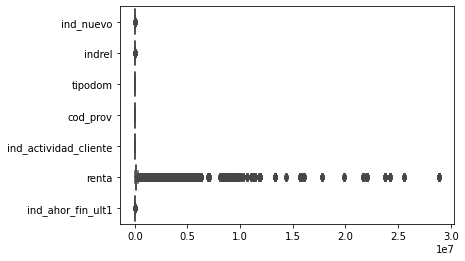

In [ ]:
# Import seaborn
import seaborn as sns

# Outliner
sns.boxplot(data = df[['ind_nuevo', 'indrel', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1']], palette= "rainbow", orient= 'h');

##### From the above graph it is evident that the dataset has outliers.